In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [44]:
def circle(a, b, r):
    # (a,b): the center of the circle
    # r: the radius of the circle
    # T: The number of the segments for drawing the circle
    T = 100
    x, y = [0]*T, [0]*T
    for i,theta in enumerate(np.linspace(0,2*np.pi,T)):
        x[i] = a + r*np.cos(theta)
        y[i] = b + r*np.sin(theta)
    return x, y


def gen():
    for theta in np.linspace(0,9*np.pi,100):
        yield R*(theta-np.sin(theta)), R*(1-np.cos(theta)), R*theta


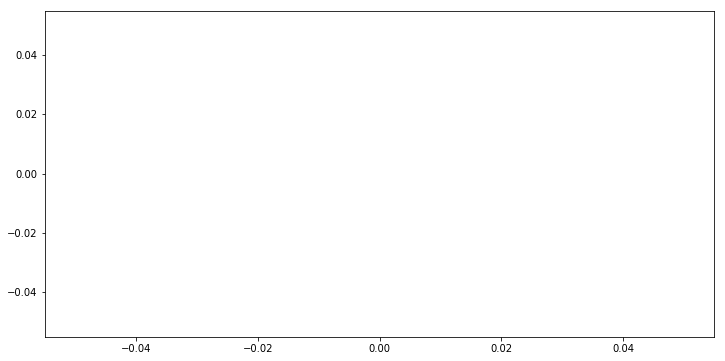

In [63]:
#Figure setup
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
time_text = ax.text(0.05, 0.8, '', transform=ax.transAxes)

#Plot layout setup
R = 3
cycloid, = plt.plot([], [], 'r-', lw=3)
line, = plt.plot([], [], 'y-', lw=3)
circle_line, = plt.plot([], [], 'g', lw=3)
point, = plt.plot([], [], 'bo', ms=5)

xx, yy = [], []

def init():
    ax.set_ylim(0, 20)
    ax.set_xlim(0, 80)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.grid()
    return 

def func(data):
    x, y, Rt = data
    #print(x, y, Rt)
    time_text.set_text(r'$\theta$ = %.2f $\pi$' % (Rt/np.pi))
    xx.append(x)
    yy.append(y)
    cx, cy = circle(Rt, R, R)
    
    cycloid.set_data(xx, yy)
    line.set_data((x,Rt), (y,R))
    circle_line.set_data(cx, cy)
    point.set_data(x, y)
    return

In [64]:
plt.rcParams['animation.html'] = 'html5'

animation = FuncAnimation(fig, func, gen, init_func=init, blit=False,interval=1./36*1500)
animation